<b>Implement K_Means Clustering / Heirarchical Clustering on sales_data_sample.csv dataset. Determine the number of clusters using the elbow method.</b>

Import required dependencies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

Read dataset from csv and get general statistcs

In [6]:
df = pd.read_csv("sales_data_sample.csv", encoding="latin-1")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


Check for Null values

In [5]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [6]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


Total Categories in target PRODUCTLINE

In [7]:
df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

Encode values

In [8]:
for c in df.columns:
    df[c] = df[c].fillna('N')
    
    if df[c].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)
    
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,112,5,1,2,2003,...,57,5,42,10,0,18,3,76,36,2
1,10121,34,81.35,5,2765.90,185,5,2,5,2003,...,40,5,56,5,27,6,1,28,54,2
2,10134,41,94.74,2,3884.34,204,5,3,7,2003,...,21,5,52,5,41,6,1,17,11,1
3,10145,45,83.26,6,3746.70,226,5,3,8,2003,...,54,5,53,1,49,18,3,75,31,1
4,10159,49,100.00,14,5205.27,23,5,4,10,2003,...,51,5,59,1,63,18,3,8,31,1


In [9]:
df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

Create feature and target variables (Clustering based on PRODUCTLINE)

In [10]:
X = df.drop('PRODUCTLINE', axis=1).values
Y = df['PRODUCTLINE'].values

print("Feature variables:\n", X)
print("\nTarget variables:", Y)

Feature variables:
 [[1.0107e+04 3.0000e+01 9.5700e+01 ... 7.6000e+01 3.6000e+01 2.0000e+00]
 [1.0121e+04 3.4000e+01 8.1350e+01 ... 2.8000e+01 5.4000e+01 2.0000e+00]
 [1.0134e+04 4.1000e+01 9.4740e+01 ... 1.7000e+01 1.1000e+01 1.0000e+00]
 ...
 [1.0386e+04 4.3000e+01 1.0000e+02 ... 2.5000e+01 1.3000e+01 1.0000e+00]
 [1.0397e+04 3.4000e+01 6.2240e+01 ... 5.9000e+01 5.0000e+00 2.0000e+00]
 [1.0414e+04 4.7000e+01 6.5520e+01 ... 7.4000e+01 3.2000e+01 1.0000e+00]]

Target variables: [1 1 1 ... 3 3 3]


Number of categories in PRODUCTLINE

In [11]:
len(df['PRODUCTLINE'].unique())

7

Plotting graph for elbow method to find 'k'. <br>
We find wcss (Within-Cluster Sum of Square) for k = 1-10, and plot a graph. Where the graph becomes almost parallel to x-axis, corresponding k value is optimal

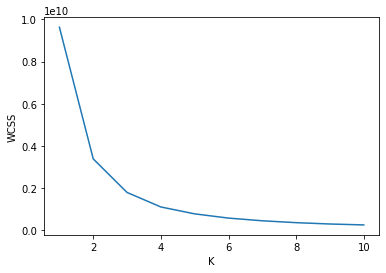

In [12]:
wcss = [] # Sum of Squared distance between each point and the centroid in a cluster

for i in range(1, 11):
  km = KMeans(n_clusters = i)
  km.fit(X)

  wcss.append(km.inertia_) # inertia_ gives wcss

plt.plot(range(1, 11), wcss)

plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

Graph starts to become flat at 4. Therefore number of optimal clusters = 4

In [13]:
#The point at which the elbow shape is created is 3, that is, our K value or an optimal number of clusters is 3.
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [14]:
y_kmeans

array([2, 2, 0, ..., 0, 2, 2])

In [16]:
kmeans.cluster_centers_[:,1]

array([37.20313943, 44.58713137, 30.8302853 ])

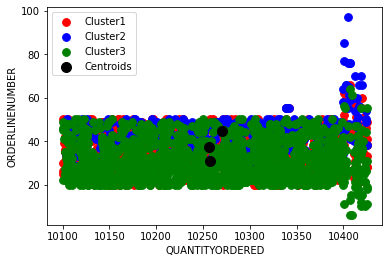

In [17]:
#Visualising the cluster
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=60, c = 'red', label='Cluster1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=60, c='blue', label='Cluster2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=60, c='green', label='Cluster3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c = 'black', label ='Centroids')

plt.xlabel('QUANTITYORDERED') 
plt.ylabel('ORDERLINENUMBER') 
plt.legend()
plt.show()
